In [1]:
import numpy as np
from helper.poly_fit import poly_fit_timescales

In [4]:
import matplotlib
import matplotlib.pyplot as plt
fs = 13
matplotlib.rcParams['font.size']=fs
matplotlib.rcParams['lines.markersize']=8

In [5]:
from allsn_info import get_at2019dge, get_iPTF14gqr, get_sn2005ek, get_iPTF16hgs, get_sn2010X, \
                        get_sn2019bkc, get_sn2018gep, get_sn2018kzr, get_ptf10iuv, get_ptf09dav, \
                        get_sn2002bj, get_iPTF16asu

### Read light curves of subluminous fast transients
AT2019dge (this work)

In [6]:
tb0 = get_at2019dge()['tb']
tb0 = tb0[tb0['filter'].values=='r']

In [7]:
x0 = tb0["tmax_rf"].values + 0.2 # previously relative to g-band, change to r-band
y0 = tb0['mag0_abs'].values
ey0 = tb0['emag'].values

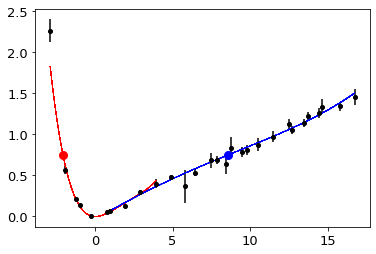

In [8]:
r0 = poly_fit_timescales(x0, y0, ey0, name = "AT2019dge")

In [9]:
r0

{'name': 'AT2019dge',
 'Mpeak': -16.272063948827928,
 'tau_rise': 2.0391902232211994,
 'tau_rise_unc': 4.440892098500626e-16,
 'tau_rise_lim': False,
 'tau_decay': 8.53696784025877,
 'tau_decay_unc': 1.7763568394002505e-15,
 'tau_decay_lim': False}

iPTF14gqr (De et al. 2018)

In [10]:
tb1 = get_iPTF14gqr()
tb1 = tb1[tb1['filter'].values=='r   ']

x1 = tb1["tmax_rf"].values[3:]
y1 = tb1['mag0_abs'].values [3:]
ey1 = tb1['emag'].values[3:]

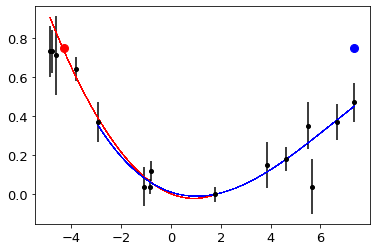

In [11]:
r1 = poly_fit_timescales(x1, y1, ey1, name = "iPTF14gqr")

In [12]:
r1["tau_rise"] = 1
r1["tau_rise_lim"] = 2
r1

{'name': 'iPTF14gqr',
 'Mpeak': -17.450069253909785,
 'tau_rise': 1,
 'tau_rise_unc': 8.881784197001252e-16,
 'tau_rise_lim': 2,
 'tau_decay': 7.365945437436003,
 'tau_decay_unc': 0.0,
 'tau_decay_lim': True}

SN2005ek (Drout et al. 2013)

In [13]:
tb2 = get_sn2005ek()
tb2 = tb2[tb2["filter"].values=="R"]

adopt r band t_max from Drout+13


In [14]:
x2 = tb2["tmax_rf"].values
y2 = tb2['mag0_abs'].values
ey2 = tb2['emag'].values

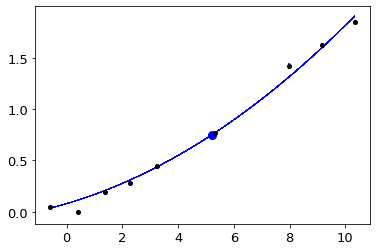

In [15]:
r2 = poly_fit_timescales(x2, y2, ey2, name = "SN2005ek")

In [16]:
r2

{'name': 'SN2005ek',
 'Mpeak': -17.424848470662628,
 'tau_rise': -99,
 'tau_rise_unc': -99,
 'tau_rise_lim': True,
 'tau_decay': 5.213707920213233,
 'tau_decay_unc': 1.7763568394002505e-15,
 'tau_decay_lim': False}

iPTF16hgs (De et al. 2018)

In [17]:
tb3 = get_iPTF16hgs()
ix = np.any([tb3["filter"].values=='r', 
             np.all([tb3["filter"].values=='o', tb3["tmax_rf"].values==min(tb3["tmax_rf"].values)], axis=0)
                    ], axis=0)
tb3 = tb3[ix]
tb3 = tb3.sort_values(by=['tmax_rf'])

In [18]:
x3 = tb3["tmax_rf"].values
y3 = tb3['mag0_abs'].values
ey3 = tb3['emag'].values

In [19]:
#%matplotlib notebook

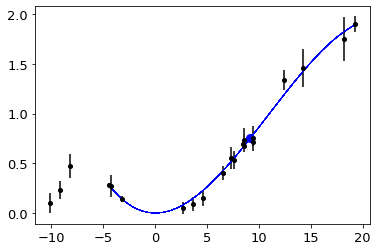

In [20]:
r3 = poly_fit_timescales(x3, y3, ey3, name = "iPTF16hgs")

In [21]:
r3["tau_rise"] = (81.32 - 69.01) / (1 + 0.017)

SN2010X (Kasliwal et al. 2010)

In [22]:
tb4 = get_sn2010X() # yes
tb4 = tb4[tb4["filter"].values=="r"]

x4 = tb4["tmax_rf"].values
y4 = tb4['mag0_abs'].values
ey4 = tb4['emag'].values

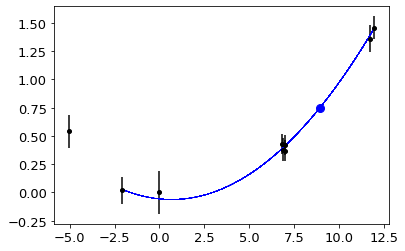

In [23]:
r4 = poly_fit_timescales(x4, y4, ey4, name = "SN2010X")

SN2019bkc (Chen et al. 2020). Add ZTF $g$-band discovery epoch.

In [24]:
tb5 = get_sn2019bkc()
ix = np.any([tb5["filter"].values=='r', 
             np.all([tb5["filter"].values=='g', tb5["tmax_rf"].values==min(tb5["tmax_rf"].values)], axis=0)
                    ], axis=0)
tb5 = tb5[ix]
# Add g-band detection
tb5 = tb5.sort_values(by=['tmax_rf'])

x5 = tb5["tmax_rf"].values
y5 = tb5['mag0_abs'].values
ey5 = tb5['emag'].values

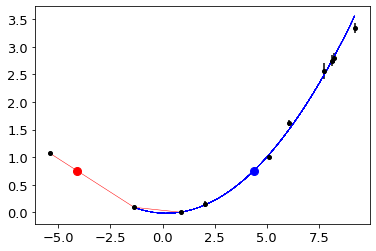

In [25]:
r5 = poly_fit_timescales(x5, y5, ey5, name = "SN2019bkc")

SN2018gep

In [26]:
tb6 = get_sn2018gep()
tb6 = tb6[tb6["filter"].values=="r"]

x6 = tb6["tmax_rf"].values
y6 = tb6['mag0_abs'].values
ey6 = tb6['emag'].values

(-0.1, 2.5)

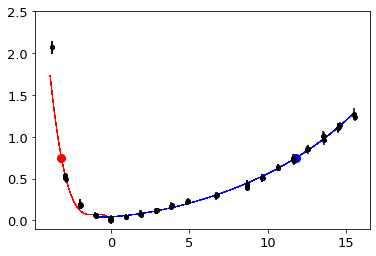

In [27]:
r6 = poly_fit_timescales(x6, y6, ey6, name = 'SN2018gep')
plt.ylim(-0.1, 2.5)

In [28]:
r6["tau_decay"] = -99

SN2018kzr (McBrien et al. 2019)

In [29]:
tb7 = get_sn2018kzr()
tb7 = tb7[tb7["filter"].values=="r"]

x7 = tb7["tmax_rf"].values
y7 = tb7['mag0_abs'].values
ey7 = tb7['emag'].values

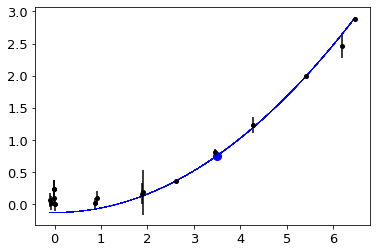

In [30]:
r7 = poly_fit_timescales(x7, y7, ey7, name = 'SN2018kzr')

PTF09dav (Sullivan et al 2011)

In [31]:
tb8 = get_ptf09dav()
x8 = tb8["tmax_rf"].values
y8 = tb8['mag0_abs'].values
ey8 = tb8['emag'].values

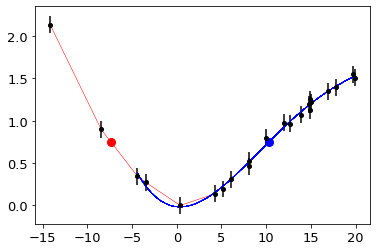

In [32]:
r8 = poly_fit_timescales(x8, y8, ey8, name = 'PTF09dav')

SN2002bj (Poznanski et al. 2010)

In [33]:
tb9 = get_sn2002bj()
ix = tb9["filter"].values == "r"
x9 = tb9["tmax_rf"].values[ix]
y9 = tb9['mag0_abs'].values[ix]
ey9 = tb9['emag'].values[ix]

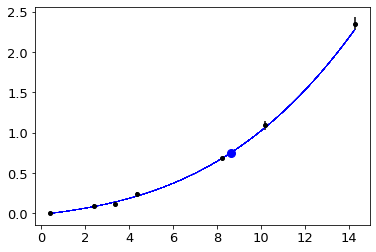

In [34]:
r9 = poly_fit_timescales(x9, y9, ey9, name = 'SN2002bj')

PTF10iuv (Kasliwal et al. 2012)

In [35]:
tb10 = get_ptf10iuv()
ix = tb10["filter"].values=='r'
tb10 = tb10[ix]
x10 = tb10["tmax_rf"].values
y10 = tb10['mag0_abs'].values
ey10 = tb10['emag'].values

adopt g band t_max estimated by myself


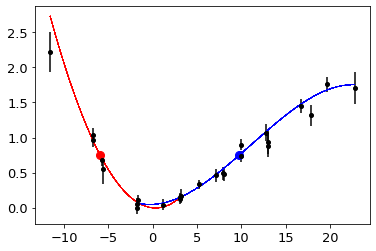

In [36]:
r10 = poly_fit_timescales(x10, y10, ey10, name = 'PTF10iuv')

iPTF16asu (Whitesides et al. 2017)

In [37]:
tb11 = get_iPTF16asu()
ix = tb11["filter"].values=='g' # but this is rest-frame r-band
tb11 = tb11[ix]
x11 = tb11["tmax_rf"].values
y11 = tb11['mag0_abs'].values
ey11 = tb11['emag'].values

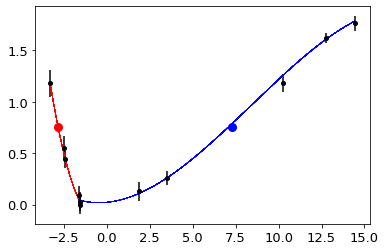

In [38]:
r11 = poly_fit_timescales(x11, y11, ey11, name = 'iPTF16asu')

In [39]:
r11["tau_decay"] = -99

KSN2015K (Rest et al. 2018)

I cannot find the photometric data. But looking at Figure 2 of this paper I get half light rise time is ~1.35 day.

In [40]:
def add_timescale_circle(r0, ax, ax2):
    name = r0["name"]
    if name == "AT2019dge":
        z1 = 2
        z2 = 3
        ms = 15
        marker="*"
    else:
        z1 = 1
        z2 = 2
        ms = 6
        marker="o"
        
    color_rise = "k"
    color_decay = "k"
    trise = r0["tau_rise"]
    tdecay = r0["tau_decay"]
    decaylim = r0['tau_decay_lim']
    riselim = r0['tau_rise_lim']
    Mpeak = r0["Mpeak"]
    
    xpos = trise + 0.2
    xpos2 = tdecay + 0.2
    ypos = Mpeak
    ypos2 = Mpeak
    fontsize = fs
    colorr = "k"
    
    if name[:2]=="SN" or name[:2]=="AT":
        tt = name[4:]
    elif name[:4] == "iPTF" or name[:4]=="OGLE":
        tt = name[4:]
    elif name[:3]=="PTF":
        tt = name[3:]
    else:
        tt = name
    if tt=="10X":
        ypos+=0.02
    if tt=="02bj":
        ypos2+=0.02
    if tt=="09dav":
        ypos+=0.05
    if tt == "19dge":
        fontsize+=2
        xpos2 -=2.5
        xpos -= 2.
        ypos += 0.25
        colorr = "r"
        color_rise = "r"
        color_decay = "r"
    if tt=="19bkc":
        ypos2 += 0.1
        xpos2 -= 2
    if tt=="05ek":
        ypos2 -= 0.1
        xpos2 -= 1
    if tt == "10iuv":
        ypos += 0.12
        xpos -= 0.3
        ypos2 += 0.13
        xpos2 -= 0.7
    if trise!=-99 and tt!="19bkc":
        if riselim!=True:
            ax.plot(trise, Mpeak, marker=marker, markersize = ms, color = color_rise, zorder = z2)
        else:
            ax.plot(trise, Mpeak, marker=marker, markersize = ms, markerfacecolor = "white", color = color_rise, zorder = z2)
        ax.text(xpos, ypos+0.05, tt, color=colorr, fontsize = fontsize)
    if tdecay!=-99:
        if decaylim!=True:
            ax2.plot(tdecay, Mpeak, marker=marker, markersize = ms, color = color_decay, zorder = z2)
        else:
            ax2.plot(tdecay, Mpeak, marker=marker, markersize = ms, markerfacecolor = "white", color = color_decay, zorder = z2)
        ax2.text(xpos2, ypos2+0.05, tt, color=colorr, fontsize = fontsize)

In [41]:
def adjust_comparefig(ax2, isrise = True):
    if isrise == True:
        ybottom = -15.3
        yupper = -20.8
        xmin = 0
        xmax = 13
    else:
        ybottom = -15.5
        yupper = -19
        xmin = 0
        xmax = 13
    ax2.set_ylim(ybottom, yupper)

    ax2.set_xlim(xmin, xmax)
    
    if isrise == False:
        xmajor = 2
        xminor = 0.5
    else:
        xmajor = 2
        xminor = 0.5
    ax2.xaxis.set_major_locator(plt.MultipleLocator(xmajor))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(xminor))
    
    if isrise == False:
        yminor = 0.1
        ymajor = 0.5
    else:
        yminor = 0.2
        ymajor = 1
    ax2.yaxis.set_major_locator(plt.MultipleLocator(ymajor))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(yminor))
    ax2.tick_params(which = 'major', length = 4, top=True, right=True)
    ax2.tick_params(which = 'minor', length = 2, top=True, right=True)
    
    #ax2.set_ylabel('Peak magnitude ($r$-band)', fontsize=fs)
    ax2.set_ylabel(r'$M_{\rm peak}$'+" ($r$-band)", fontsize=fs+2)
    if isrise == True:
        ax2.set_xlabel(r"$t_{\rm rise}$"+" (rest-frame days)", fontsize=fs+1)
    else:
        ax2.set_xlabel(r"$t_{\rm decay}$"+" (rest-frame days)", fontsize=fs+1)

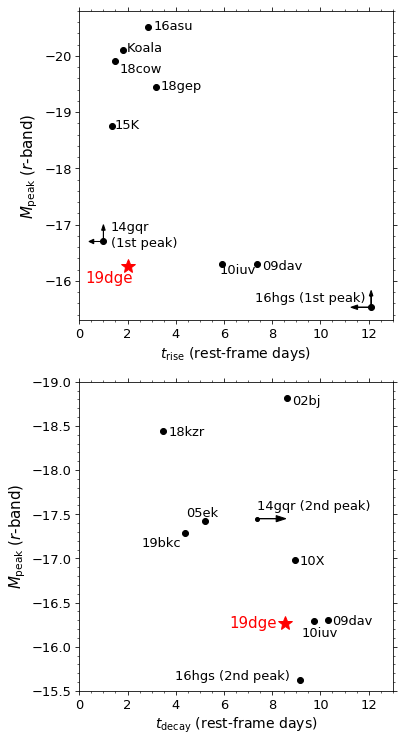

In [42]:
xnum = 5.8
ynum = 10.5

fig = plt.figure(figsize=(xnum, ynum))
ax = plt.subplot(211)
ax2 = plt.subplot(212)
add_timescale_circle(r0, ax, ax2)

# iPTF14gqr 1st peak rise
ax.plot(r1['tau_rise'], y1[0], 'o', ms=6, color= "k")
ax.arrow(r1['tau_rise'], y1[0], -0.8*0.5, 0, color = 'k', zorder = 6, head_width = 0.08, head_length = 0.4*0.5)
ax.arrow(r1['tau_rise'], y1[0], 0, -0.8*0.25, color = 'k', zorder = 6, head_width = 0.15, head_length = 0.4*0.25)
xoff = 1.2
yoff = +0.5
ax.text(0.1+xoff, -17.4+yoff, "14gqr")
ax.text(0.1+xoff, -17.1+yoff, "(1st peak)")

# iPTF14gqr, 2nd peak decay
Mpeak = r1["Mpeak"]
ax2.plot(r1['tau_decay'], Mpeak, 'o', ms=4, color= "k")
ax2.arrow(r1['tau_decay'], Mpeak, 0.8, 0, color = 'k', zorder = 6, head_width = 0.07, head_length = 0.4)
ax2.text(r1['tau_decay'], Mpeak-0.1, "14gqr (2nd peak)")

add_timescale_circle(r2, ax, ax2)

# iPTF16hgs 1st peak rise
ax.plot(r3["tau_rise"], y3[0], 'o', ms=6, color= "k")
ax.arrow(r3['tau_rise'], y3[0], -0.8*0.7, 0, color = 'k', zorder = 6, head_width = 0.08, head_length = 0.4*0.7)
ax.arrow(r3['tau_rise'], y3[0], 0, -0.8*0.25, color = 'k', zorder = 6, head_width = 0.15, head_length = 0.4*0.25)
ax.text(r3["tau_rise"]-4.8, y3[0]-0.1, "16hgs (1st peak)")

# iPTF16hgs 2nd peak decay
Mpeak = r3["Mpeak"]
ax2.plot(r3["tau_decay"], Mpeak, 'o', ms=6, color= "k")
ax2.text(r3["tau_decay"]-5.2, Mpeak, "16hgs (2nd peak)")

"""
# SN2019ehk, 1st peak rise
ax.plot(2.9, -16.36, 'o', ms=6, color= "k", zorder = 6)
#ax.arrow(2.9, -16.36, 0, -0.8*0.25, color = 'k', zorder = 6, head_width = 0.15, head_length = 0.4*0.25)
ax.plot([2.9, 2.9], [-16.36, -17.7], "k-", zorder = 6)
ax.plot([2.9-0.1, 2.9+0.1], [-17.7, -17.7], "k-", zorder = 6)
ax.text(3, -16.8, "19ehk (1st-peak)")
"""
add_timescale_circle(r4, ax, ax2)
add_timescale_circle(r5, ax, ax2)
add_timescale_circle(r6, ax, ax2)
add_timescale_circle(r7, ax, ax2)
add_timescale_circle(r8, ax, ax2)
add_timescale_circle(r9, ax, ax2)
add_timescale_circle(r10, ax, ax2)
add_timescale_circle(r11, ax, ax2)

# 15K (Rest et al. 2018)
ax.plot(1.35, -18.75, 'o', ms=6, color= "k")
ax.text(1.45, -18.7, "15K", color= "k")

# AT2018cow (Perley et al. 2019)
ax.plot(1.5, -19.9, 'o', ms=6, color= "k")
ax.text(1.65, -19.7, "18cow", color= "k")

# AT2018cow (Perley et al. 2019)
ax.plot(1.8, -20.1, 'o', ms=6, color= "k")
ax.text(1.95, -20.08, "Koala", color= "k")

adjust_comparefig(ax, isrise = True)
adjust_comparefig(ax2, isrise = False)
plt.tight_layout()
plt.savefig("../paper/figures/compare_mag.pdf")
#plt.close()